In [2]:
import struct
import numpy as np
from sklearn import neighbors, metrics
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
def readIdx(filename):
    with open(filename, 'rb') as f:
        zero, dataType, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
rawTrain = readIdx(os.path.abspath('') + "/../datasets/train-images.idx3-ubyte")
trainData = np.reshape(rawTrain, (60000, 28*28))
trainLabel = readIdx(os.path.abspath('') + "/../datasets/train-labels.idx1-ubyte")

rawTest = readIdx(os.path.abspath('') + "/../datasets/t10k-images.idx3-ubyte")
testData = np.reshape(rawTest, (10000, 28*28))
testLabel = readIdx(os.path.abspath('') + "/../datasets/t10k-labels.idx1-ubyte")

In [5]:
idx = (trainLabel == 2) | (trainLabel == 3) | (trainLabel ==8)
X = trainData[idx]
Y = trainLabel[idx]

knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X, Y)


In [6]:
idx = (testLabel == 2) | (testLabel == 3) | (testLabel == 8)
xTest = testData[idx]
yTrue = testLabel[idx]
yPred = knn.predict(xTest)

In [7]:
import itertools

def plotConfusionMatrix(cm, classes,
                        normalize=False,
                        title="Confusion Matrix",
                        cmap=plt.cm.Blues,
                        ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normallized confusion matrix")
    else:
        print("Confusion matrix, without normalization")    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickMarks = np.arange(len(classes))
    plt.xticks(tickMarks, classes, rotation=45)
    plt.yticks(tickMarks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color='white' if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1025    3    4]
 [   5 1001    4]
 [   6   16  952]]


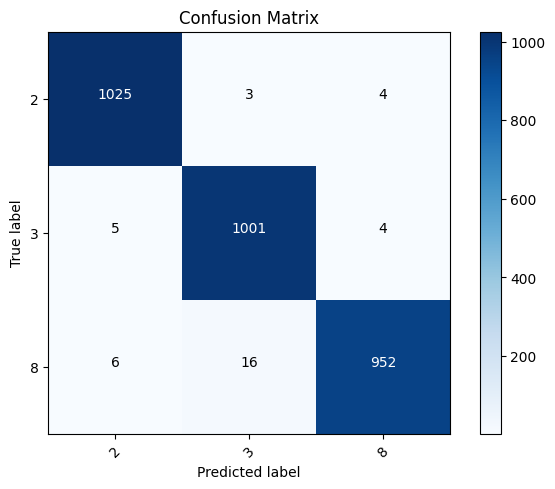

In [8]:
cm = metrics.confusion_matrix(yTrue, yPred)
plotConfusionMatrix(cm, ["2", "3", "8"])